In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
df=pd.read_csv("/content/drive/MyDrive/Project datasets/Groceries data.csv")
df.head()

,Member_number,Date,itemDescription,year,month,day,day_of_week
0,1808,2015-07-21,tropical fruit,2015,7,21,1
1,2552,2015-05-01,whole milk,2015,5,1,4
2,2300,2015-09-19,pip fruit,2015,9,19,5
3,1187,2015-12-12,other vegetables,2015,12,12,5
4,3037,2015-01-02,whole milk,2015,1,2,4


In [10]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
 3   year             38765 non-null  int64 
 4   month            38765 non-null  int64 
 5   day              38765 non-null  int64 
 6   day_of_week      38765 non-null  int64 
dtypes: int64(5), object(2)
memory usage: 2.1+ MB


In [11]:
df.isnull()

,Member_number,Date,itemDescription,year,month,day,day_of_week
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
38760,False,False,False,False,False,False,False
38761,False,False,False,False,False,False,False
38762,False,False,False,False,False,False,False
38763,False,False,False,False,False,False,False


In [12]:
df.isnull().sum().sort_values(ascending=False)

,0
Member_number,0
Date,0
itemDescription,0
year,0
month,0
day,0
day_of_week,0


In [13]:
df.head()
df.shape

(38765, 7)

In [14]:
data=df.groupby(by='itemDescription').size().to_frame().reset_index()
data.columns=['itemDescription','Frequency']
data.head()

,itemDescription,Frequency
0,Instant food products,60
1,UHT-milk,323
2,abrasive cleaner,22
3,artif. sweetener,29
4,baby cosmetics,3


In [15]:
data.head()

,itemDescription,Frequency
0,Instant food products,60
1,UHT-milk,323
2,abrasive cleaner,22
3,artif. sweetener,29
4,baby cosmetics,3


164          whole milk
102    other vegetables
122          rolls/buns
138                soda
165              yogurt
123     root vegetables
156      tropical fruit
12        bottled water
130             sausage
30         citrus fruit
Name: itemDescription, dtype: object 164    2502
102    1898
122    1716
138    1514
165    1334
123    1071
156    1032
12      933
130     924
30      812
Name: Frequency, dtype: int64
<class 'pandas.core.series.Series'>


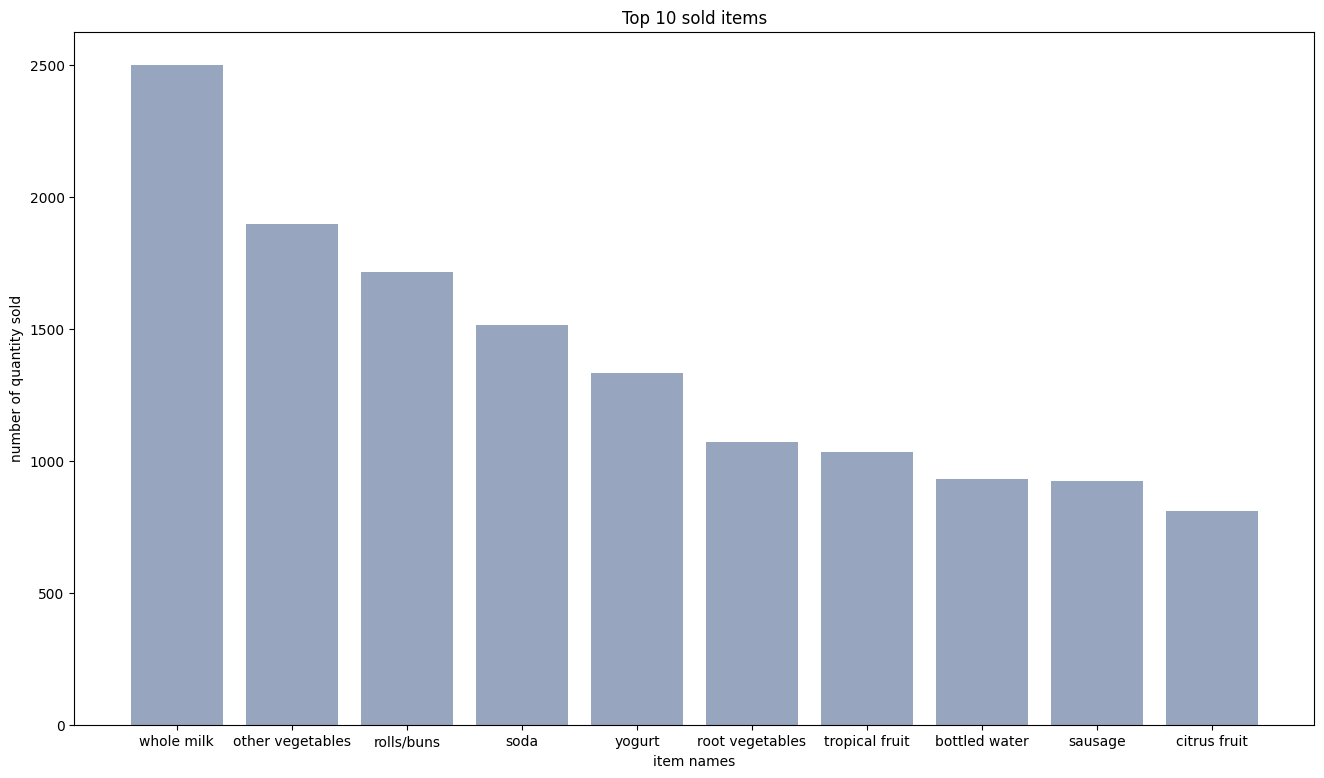

In [16]:
data=df.groupby(by='itemDescription').size().to_frame().reset_index()
data.columns=['itemDescription','Frequency']
data=data.sort_values(by="Frequency",ascending=False).head(10)
# data.shape

x_Axis=data["itemDescription"]
y_Axis=data["Frequency"]
print(data["itemDescription"],data["Frequency"])
print(type(data["itemDescription"]))

plt.figure(figsize=(16,9))

plt.bar(x_Axis,y_Axis,color=(0.2,0.3,0.5,0.5))

plt.title("Top 10 sold items")
plt.xlabel("item names")
plt.ylabel("number of quantity sold")


plt.show()

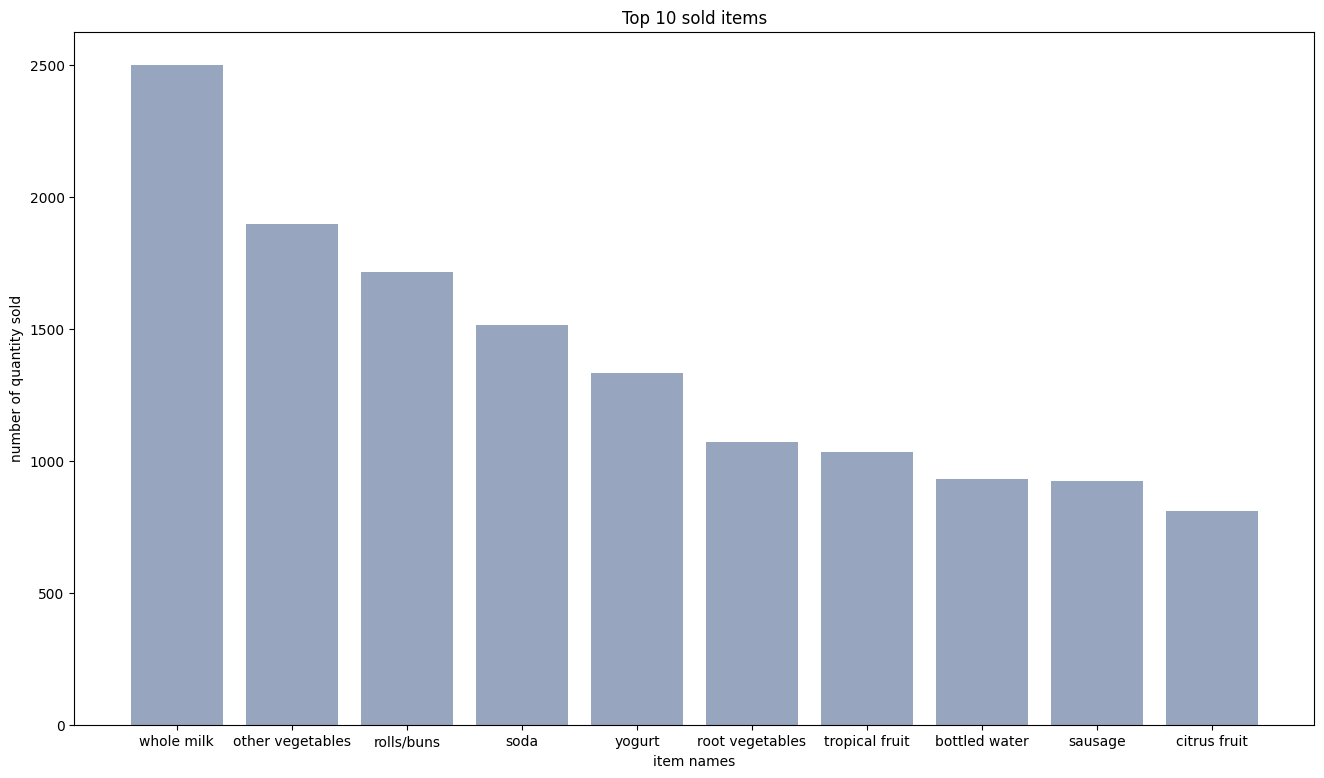

In [19]:
#data=df.groupby(by='itemDescription').size().reset_index().sort_values(by='Frequency',ascending=False).head(10)

data=df.groupby(by='itemDescription').size().to_frame().reset_index().sort_values(by=0,ascending=False).head(10) #The values are in column 0, not 'Frequency'
data.columns=['itemDescription','Frequency'] #Rename column 0 to 'Frequency'

x_Axis=data['itemDescription'] # Use 'data' instead of 'Item_distr'
y_Axis=data['Frequency'] # Use 'data' instead of 'Item_distr'

plt.figure(figsize=(16,9))

plt.bar(x_Axis,y_Axis,color=(0.2,0.3,0.5,0.5)) #rgba (alpha-> opacity)

plt.title("Top 10 sold items")
plt.xlabel("item names")
plt.ylabel("number of quantity sold")


plt.show()
# data=df.groupby(by='itemDescription').size().to_frame().reset_index()
# data.columns=['itemDescription','Frequency']
# data=data.groupby(by='itemDescription')
# data=data.sort_values(by='Frequency',ascending=False).head(10)
# data=df[['itemDescription','']]
# x_Axis=data['itemDescription']
# y_Axis=data['Frequency']

# plt.figure(figsize=(16,9))

# plt.bar(x_Axis,y_Axis,color=(0.2,0.3,0.5,0.5))

# plt.title("Top 10 sold items")
# plt.xlabel("item names")
# plt.ylabel("number of quantity sold")


# plt.show()

In [20]:
cust_level=df[["Member_number","itemDescription"]].sort_values(by="Member_number",ascending=False)
cust_level['itemDescription']=cust_level["itemDescription"].str.strip()
cust_level

,Member_number,itemDescription
3578,5000,soda
34885,5000,semi-finished bread
11728,5000,fruit/vegetable juice
9340,5000,bottled beer
19727,5000,root vegetables
...,...,...
13331,1000,whole milk
17778,1000,pickled vegetables
6388,1000,sausage
20992,1000,semi-finished bread


In [22]:
# cust_level.groupby("Member_number")
# cust_level.head()
for a in list(cust_level.groupby("Member_number")):
  print(a,type(a))

  # 4533 ->a,b,c,d
  # 4534->c,d,e,f
  # [[a,b,c,d],[c,d,e,f]]

Streaming output truncated to the last 5000 lines.
651             4530              margarine
16873           4530          domestic eggs) <class 'tuple'>
(4531,        Member_number        itemDescription
31051           4531                  flour
3189            4531          bottled water
17318           4531                   meat
32096           4531                 pastry
5824            4531            canned beer
1169            4531                   pork
27038           4531               cat food
540             4531            frankfurter
9189            4531                 pastry
34296           4531                   soda
25338           4531         frozen dessert
14902           4531  chocolate marshmallow
19338           4531                 onions
16689           4531          shopping bags
21973           4531                  herbs
15947           4531            brown bread
10889           4531              beverages) <class 'tuple'>
(4532,        Member_number 

In [23]:
print(a,type(a))
print(a[0],type(a[0]))
print(a[1],type(a[1]))
print(a[1]['itemDescription'].tolist())

(5000,        Member_number        itemDescription
3578            5000                   soda
34885           5000    semi-finished bread
11728           5000  fruit/vegetable juice
9340            5000           bottled beer
19727           5000        root vegetables
25489           5000       other vegetables
27877           5000                 onions) <class 'tuple'>
5000 <class 'int'>
       Member_number        itemDescription
3578            5000                   soda
34885           5000    semi-finished bread
11728           5000  fruit/vegetable juice
9340            5000           bottled beer
19727           5000        root vegetables
25489           5000       other vegetables
27877           5000                 onions <class 'pandas.core.frame.DataFrame'>
['soda', 'semi-finished bread', 'fruit/vegetable juice', 'bottled beer', 'root vegetables', 'other vegetables', 'onions']


In [24]:
cust_level=df[["Member_number","itemDescription"]].sort_values(by="Member_number",ascending=False)
cust_level['itemDescription']=cust_level["itemDescription"].str.strip()
cust_level
transactions=[a[1]['itemDescription'].tolist() for a in list(cust_level.groupby("Member_number"))]

In [25]:
transactions

[['misc. beverages',
  'sausage',
  'soda',
  'yogurt',
  'salty snack',
  'pastry',
  'canned beer',
  'hygiene articles',
  'whole milk',
  'pickled vegetables',
  'sausage',
  'semi-finished bread',
  'whole milk'],
 ['beef',
  'sausage',
  'frankfurter',
  'soda',
  'whipped/sour cream',
  'frankfurter',
  'rolls/buns',
  'soda',
  'white bread',
  'whole milk',
  'whole milk',
  'curd'],
 ['specialty chocolate',
  'butter',
  'whole milk',
  'butter milk',
  'tropical fruit',
  'sugar',
  'other vegetables',
  'frozen vegetables'],
 ['dental care',
  'rolls/buns',
  'rolls/buns',
  'frozen meals',
  'rolls/buns',
  'sausage',
  'detergent',
  'root vegetables'],
 ['frozen fish',
  'shopping bags',
  'hygiene articles',
  'rolls/buns',
  'whole milk',
  'canned beer',
  'root vegetables',
  'tropical fruit',
  'whole milk',
  'chocolate',
  'other vegetables',
  'red/blush wine',
  'pastry',
  'rolls/buns',
  'packaged fruit/vegetables',
  'dish cleaner',
  'pip fruit',
  'other ve

In [26]:
type(transactions)

list

In [27]:
!pip install apyori

In [28]:
from apyori import apriori
rules=apriori(transactions=transactions,min_support=0.002,min_confidence=0.05,min_lift=3)

In [30]:
results=list(rules)

In [31]:
type(rules)

generator

In [35]:
from apyori import apriori

# Check if transactions is defined and not empty
if 'transactions' in locals() and transactions:
  rules = apriori(transactions=transactions, min_support=0.002, min_confidence=0.05, min_lift=3)
  results = list(rules)

  # Check if any rules were generated
  if results:
    result = results[0]

    print(result)
    print(result[0])
    print(result[1])
    print(result[2])  # list of tuple
    print(result[2][0])
    print(result[2][0][0])
    print(result[2][0][1])
    print(result[2][0][2])
    print(result[2][0][3])
  else:
    print("No rules were generated. Please check your input data and parameters.")
else:
  print("The variable 'transactions' is not defined or is empty. Please ensure it is properly defined before running apriori.")

RelationRecord(items=frozenset({'UHT-milk', 'kitchen towels'}), support=0.002308876346844536, ordered_statistics=[OrderedStatistic(items_base=frozenset({'kitchen towels'}), items_add=frozenset({'UHT-milk'}), confidence=0.30000000000000004, lift=3.821568627450981)])
frozenset({'UHT-milk', 'kitchen towels'})
0.002308876346844536
[OrderedStatistic(items_base=frozenset({'kitchen towels'}), items_add=frozenset({'UHT-milk'}), confidence=0.30000000000000004, lift=3.821568627450981)]
OrderedStatistic(items_base=frozenset({'kitchen towels'}), items_add=frozenset({'UHT-milk'}), confidence=0.30000000000000004, lift=3.821568627450981)
frozenset({'kitchen towels'})
frozenset({'UHT-milk'})
0.30000000000000004
3.821568627450981


In [36]:
def inspect(results):
  lhs=[tuple(result[2][0][0])[0] for result in results]
  rhs=[tuple(result[2][0][1])[0] for result in results]
  supports=[result[1] for result in results]
  confidence=[result[2][0][2] for result in results]
  lifts=[result[2][0][3] for result in results]
  return list(zip(lhs,rhs,supports,confidence,lifts))
resultsindataframe=pd.DataFrame(inspect(results),columns=['Left Hand Side','Right hand side','Support','Confidence','Lift'])

In [37]:
resultsindataframe.nlargest(n=10,columns='Lift')

,Left Hand Side,Right hand side,Support,Confidence,Lift
4915,bottled water,pip fruit,0.002052,0.105263,14.654135
4914,bottled water,whole milk,0.002052,0.105263,12.068111
2674,oil,other vegetables,0.002052,0.242424,11.524021
3573,brown bread,specialty chocolate,0.002052,0.073394,11.443670
4133,long life bakery product,whole milk,0.002052,0.148148,11.105413
3290,oil,citrus fruit,0.002052,0.150943,10.322410
2904,brown bread,other vegetables,0.002309,0.097826,9.533152
5045,meat,whole milk,0.002052,0.135593,9.438257
2902,brown bread,domestic eggs,0.002052,0.086957,9.415459
2734,bottled water,brown bread,0.002309,0.118421,9.232105
